<a href="https://colab.research.google.com/github/VejAlDatt/Prediction-System-for-Emergency-Operators/blob/main/DataAcquisition%26Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Understanding**

### ***Section 1: Data Quality Assessment***

The section shall seek to provide a preliminary assessment on the overall utility of the provided dataset to identify any hurdle that might need to be overcome.


In [ ]:
#Importation of libraries

import pandas
from pandas.core.dtypes.cast import convert_dtypes
import math
import plotly.express
import matplotlib.pyplot
from plotly.subplots import make_subplots
import seaborn

In [ ]:

# Loading the Dataset
sicknessDataframe = pandas.read_csv("/content/sickness_table.csv")

# Designating the date column as the index, and appropriately name the column
sicknessDataframe = sicknessDataframe.set_index(['date'])
sicknessDataframe.rename(columns={'Unnamed: 0':'calendar_day'}, inplace=True )
sicknessDataframe.head()

,calendar_day,n_sick,calls,n_duty,n_sby,sby_need,dafted
date,,,,,,,
2016-04-01,0,73,8154.0,1700,90,4.0,0.0
2016-04-02,1,64,8526.0,1700,90,70.0,0.0
2016-04-03,2,68,8088.0,1700,90,0.0,0.0
2016-04-04,3,71,7044.0,1700,90,0.0,0.0
2016-04-05,4,63,7236.0,1700,90,0.0,0.0


**Section 1.1: Sickness Dataset Summary**

Based on the following information, the dataset contains 1152 entries and a total of seven columns described as follows:



1.  calendar_day: entry date
2.  n_sick: number of drivers called sick on duty
3.  calls: number of emergency calls
4.  n_duty: number of drivers on duty available
5.  n_sby: number of standby resources available
6.  sby_need: number of standbys, which are activated on a given day
7.  dafted: number of additional drivers needed due to not enough standbys





In [ ]:
sicknessDataframe.describe(include="all")

,calendar_day,n_sick,calls,n_duty,n_sby,sby_need,dafted
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.0,1152.000000,1152.000000
mean,575.500000,68.808160,7919.531250,1820.572917,90.0,34.718750,16.335938
std,332.698061,14.293942,1290.063571,80.086953,0.0,79.694251,53.394089
min,0.000000,36.000000,4074.000000,1700.000000,90.0,0.000000,0.000000
25%,287.750000,58.000000,6978.000000,1800.000000,90.0,0.000000,0.000000
50%,575.500000,68.000000,7932.000000,1800.000000,90.0,0.000000,0.000000
75%,863.250000,78.000000,8827.500000,1900.000000,90.0,12.250000,0.000000
max,1151.000000,119.000000,11850.000000,1900.000000,90.0,555.000000,465.000000


In [ ]:
sicknessDataframe.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calendar_day  1152 non-null   int64  
 1   n_sick        1152 non-null   int64  
 2   calls         1152 non-null   float64
 3   n_duty        1152 non-null   int64  
 4   n_sby         1152 non-null   int64  
 5   sby_need      1152 non-null   float64
 6   dafted        1152 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 72.0+ KB


**Section 1.2: Data Quality Evaluation**

The following are independent assessments perfomed to ascertain the sickness dataset quality.

**Section 1.2.1:**  Evaluating the data type of columns suitability against the description of those columns as listed in Section 1.1

In [ ]:
sicknessDataframe.dtypes

calendar_day      int64
n_sick            int64
calls           float64
n_duty            int64
n_sby             int64
sby_need        float64
dafted          float64
dtype: object

**Analysis:** The attributes 'calls', 'sby_need', 'dafted' are intended based on their columnar description to represent whole number entities in their own right. For example, 'calls' represents the number of emergency calls made which ought to be represented as a whole number, similarly 'sby_need' and 'dafted' represent individual drivers which are whole entities and cannot be represented as fractional. Hence, the aforementioned columns datatypes will be updated to *int64.*

In [ ]:
sicknessDataframe["calls"] = sicknessDataframe["calls"].convert_dtypes(convert_integer=True)
sicknessDataframe["sby_need"] = sicknessDataframe["sby_need"].convert_dtypes(convert_integer=True)
sicknessDataframe["dafted"] = sicknessDataframe["dafted"].convert_dtypes(convert_integer=True)
sicknessDataframe.dtypes

calendar_day    int64
n_sick          int64
calls           Int64
n_duty          int64
n_sby           int64
sby_need        Int64
dafted          Int64
dtype: object

**Section 1.2.2:** Exploring the Sickness Dataset for the presence of and quantity of missing values and invalid values.

In [ ]:
# Checking for missing values and/or invalid values
sicknessDataframe.isnull().values.any()


False

**Analysis:** The Sickness Dataset contains NO missing values or invalid values in any of its data fields

**Section 1.2.3:** Checking for Duplicate values in the Sickness Dataset

In [ ]:
len(sicknessDataframe[sicknessDataframe.duplicated()==True])

0

**Analysis:** There are no duplicated values in the Sickness Dataset.

**Section 1.2.4:** Checking for outliers, or systematic deviations that could potentially affect the data processing phase

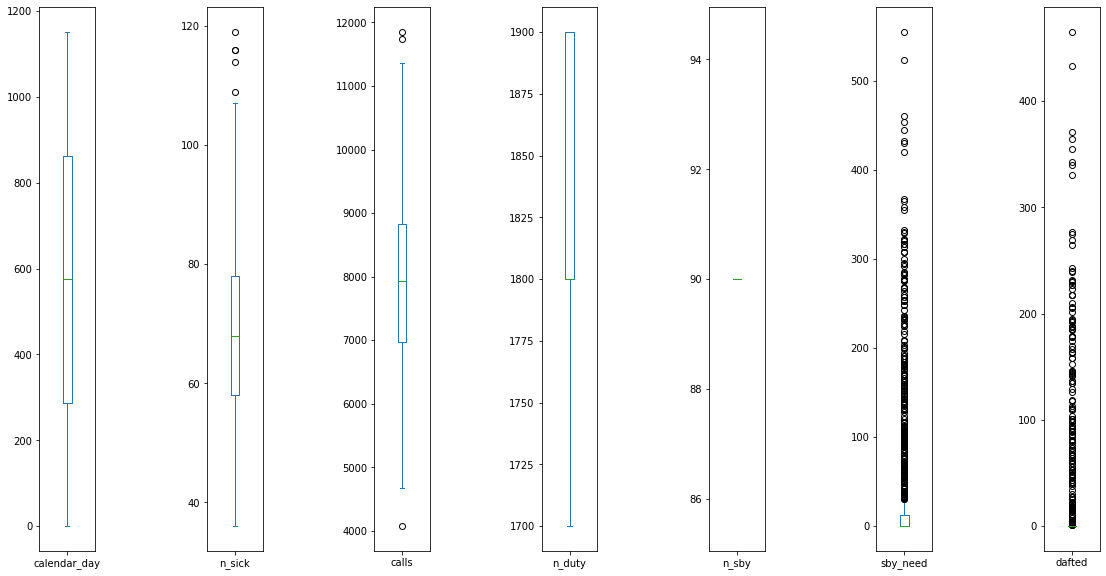

In [ ]:
sicknessDataframe.plot(
    kind='box', 
    subplots=True, 
    figsize=(19, 10)
)
matplotlib.pyplot.subplots_adjust(wspace=2) 
matplotlib.pyplot.show()

**Analysis:** The column 'n_sby' is a constant number throughout the dataset, hence no outlier could be deciphered. Further, the columns 'n_duty' and 'calendar day' have no outliers. Given that 0.3% of most normal distributions are considered acceptable outliers, the few outliers in columns 'n_sick' and 'calls' are justifiable (CueMath, n.d.). It is important to note that 'sby_need' and 'dafted' are dependent on each other. When all the 90 stand-by drivers are activated, only then are additional drivers used. The primary purpose of this prediction model is to curtail the outlier spread that this project will envision, which will predict the optimal number of standby drives. Hence, situations with not enough standby should occur less.

### ***Section 2: Exploratory Data Analysis***

This section shall seek to explore in detail the correlation, distribution, and spread among data variables. 

**Section 2.1 Correlation Analysis**

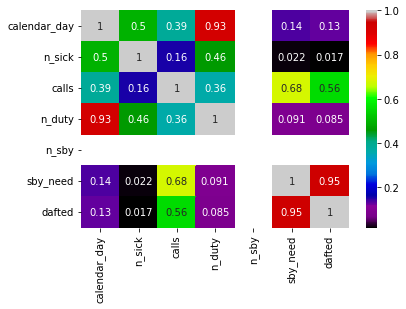

In [ ]:
seaborn.heatmap(sicknessDataframe.corr(method='pearson'), annot=True, cmap = 'nipy_spectral', robust = True)


**Analysis:** Based on the figure above, the following features have a strong to moderately positive pearson correlation:
*   Calendar_day and n_duty
*   Calendar_day and n_sick
*   calls and sby_need
*   calls and dafted
*   sby_need and dafted

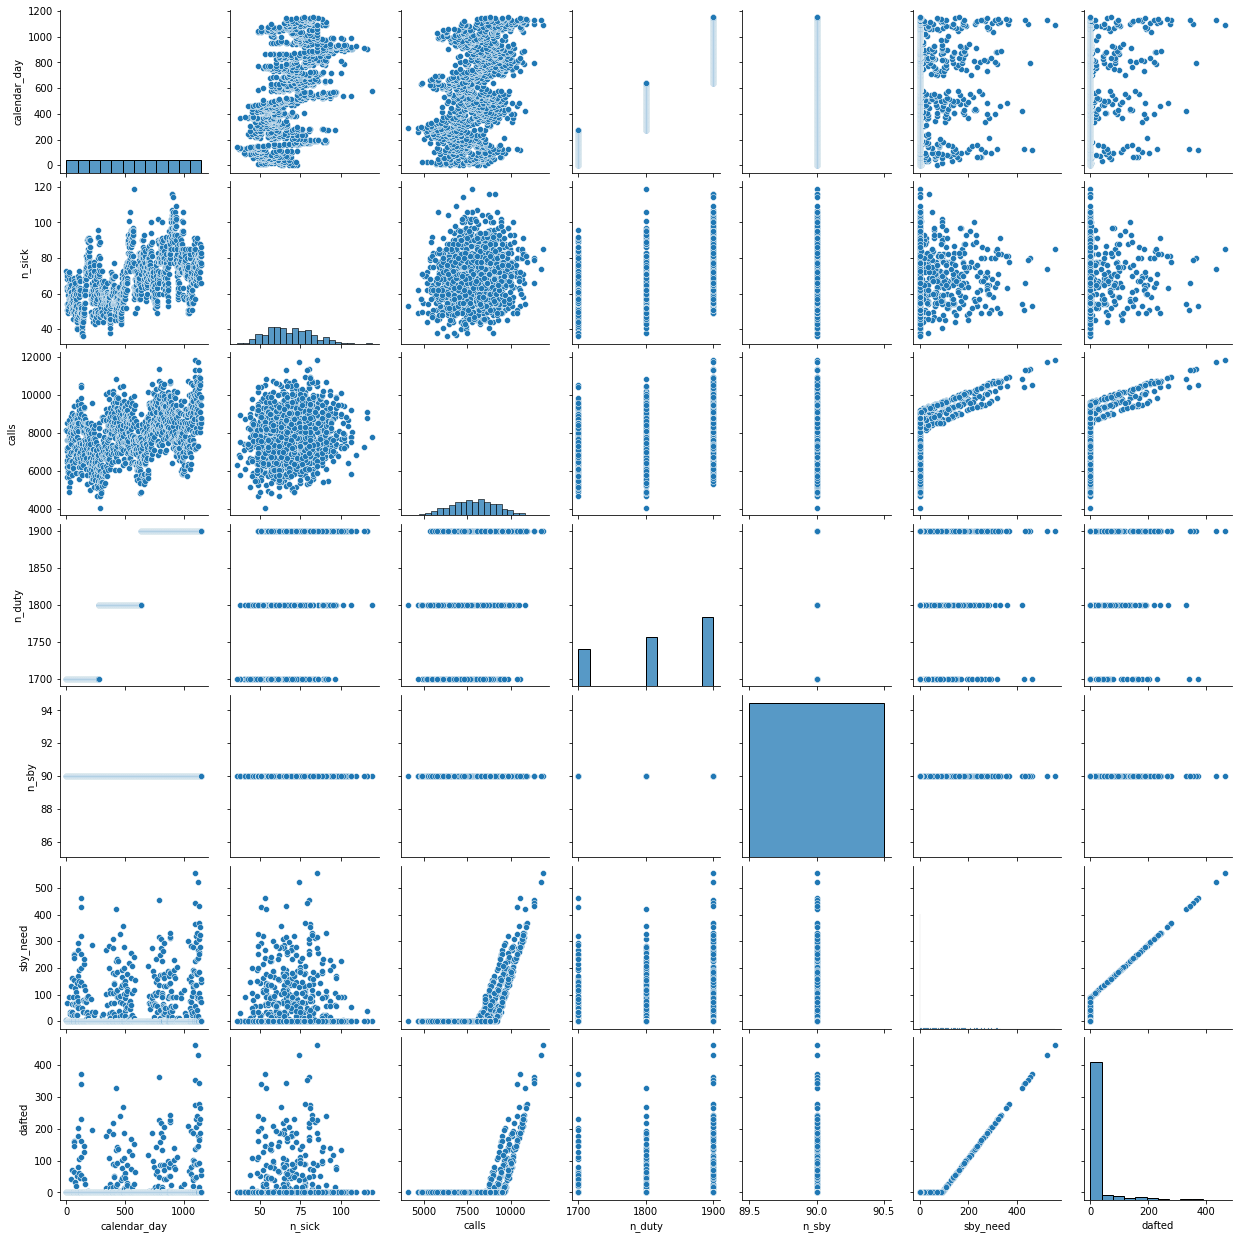

In [ ]:
seaborn.pairplot(sicknessDataframe)

**Analysis:** Based on the graphs, there seems to exist a seasonal pattern between features, Calendar Days and n_sick, whilst there was a directly proportional relationship between Calendar Day and n_duty. Further, the relationship between calls and sby_need, and calls and dafted is also directly proportional, which means as the number of calls grew, so does the number of additional and stand-by drivers. The relationship between sby_need and dafted is also positively directly proportional.

**Section 2.2: A Closer Look at FEATURES**

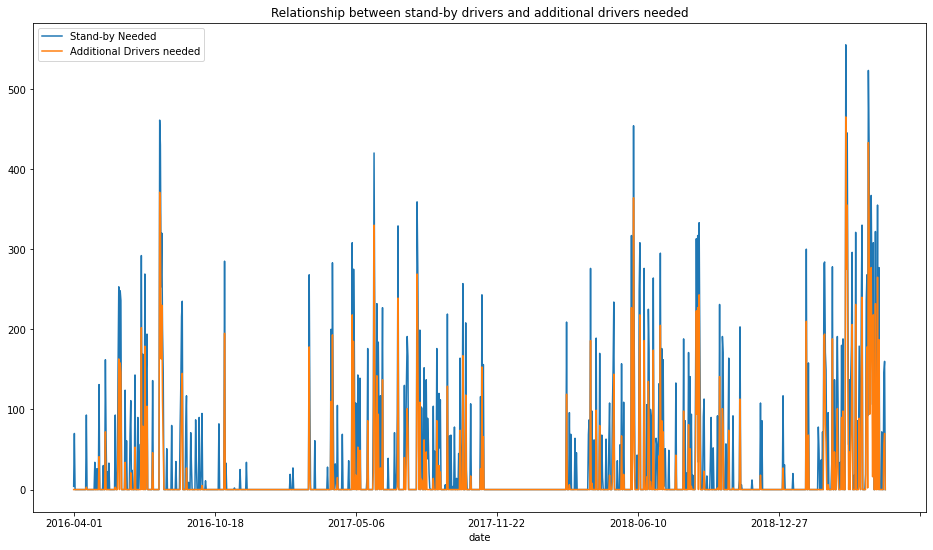

In [ ]:

graph, axes = matplotlib.pyplot.subplots(figsize=(16,9))
sicknessDataframe.sby_need.plot(ax=axes, label="Stand-by Needed")
sicknessDataframe.dafted.plot(ax=axes, label="Additional Drivers needed")
matplotlib.pyplot.title("Relationship between stand-by drivers and additional drivers needed")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()


**Analysis:** Based on the graph above, it can be deciphered that they were many occasions where uncertainty prevailed on the number of stand-by drivers needed, which led to the activation of additional drivers in almost 25% of the spread of the data above. Further, it should be noted that only in very few instances was the number of additional drivers greater than the number of initially imposed standby drivers.

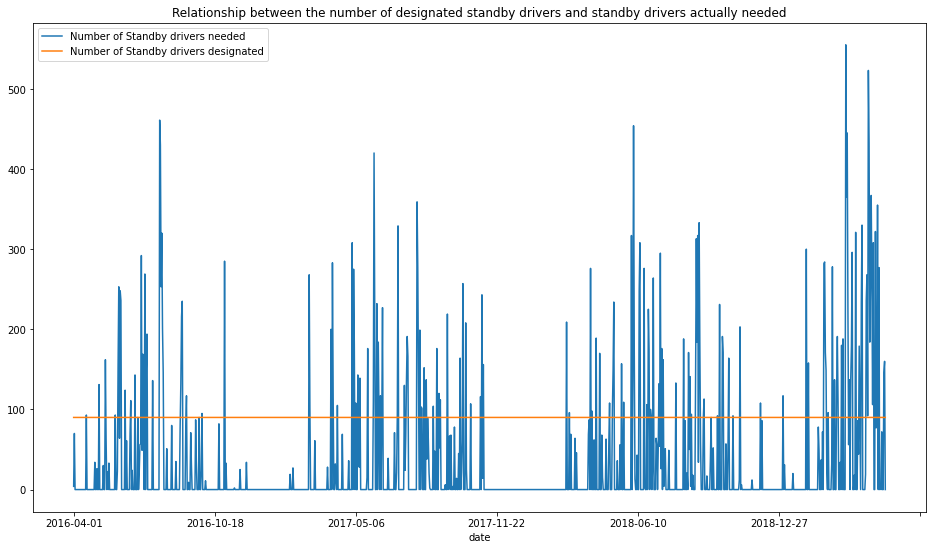

In [ ]:
graph, axes = matplotlib.pyplot.subplots(figsize=(16,9))
sicknessDataframe.sby_need.plot(ax=axes, label="Number of Standby drivers needed")
sicknessDataframe.n_sby.plot(ax=axes, label="Number of Standby drivers designated")
matplotlib.pyplot.title("Relationship between the number of designated standby drivers and standby drivers actually needed")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

**Analysis:** Based on the figure above, it can be deciphered that there existed fluctuations in the spread of the number of standby drivers needed, which means that there exists times when fewer than the ninety (90) designated drivers are needed and times when greater than the ninety (90) designated drivers are needed. 

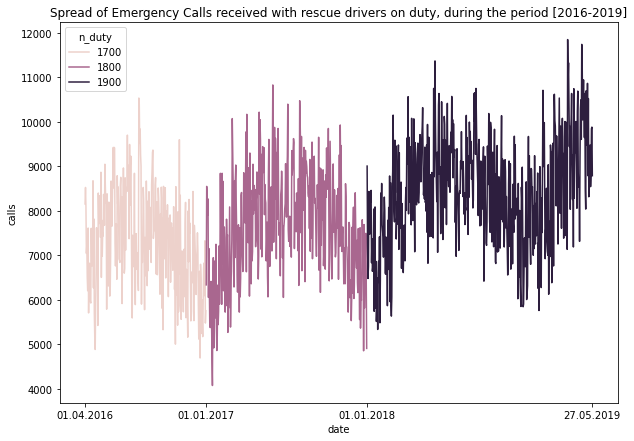

In [ ]:
matplotlib.pyplot.figure(figsize=(10,7))
seaborn.lineplot(x='date', y='calls', data=sicknessDataframe, hue='n_duty')
matplotlib.pyplot.xticks(ticks=[0, 275, 640, 1151], labels=['01.04.2016', '01.01.2017', '01.01.2018', '27.05.2019'])
matplotlib.pyplot.title("Spread of Emergency Calls received with rescue drivers on duty, during the period [2016-2019]")
matplotlib.pyplot.show()

**Analysis:** Based on the graph above, it should be noted that not only did the number of emergency calls increased with each succeeding year, but also the number of on duty rescue drivers also increased relative to the number of calls and succeeding years, hence the spread of data being larger with each succeeding year.

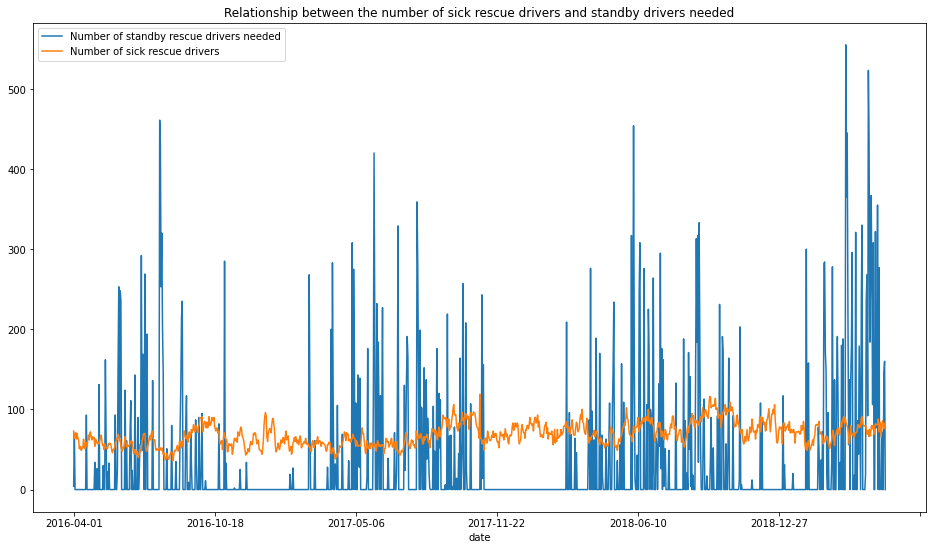

In [ ]:
graph, axes = matplotlib.pyplot.subplots(figsize=(16,9))
sicknessDataframe.sby_need.plot(ax=axes, label="Number of standby rescue drivers needed")
sicknessDataframe.n_sick.plot(ax=axes, label="Number of sick rescue drivers")
matplotlib.pyplot.title("Relationship between the number of sick rescue drivers and standby drivers needed")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

In [ ]:
# Counting the number of times standby needs were greater than the number of sick rescue drivers
count = (sicknessDataframe['sby_need'] > sicknessDataframe['n_sick']).sum()
print(count)

201


**Analysis:** Based on the graph above, the overall average of sick rescue drivers grew with each succeeding year. Fortunately, only 17% of the distribution were the number of standby drivers needed most, during the period when a large number of rescue drivers were sick.

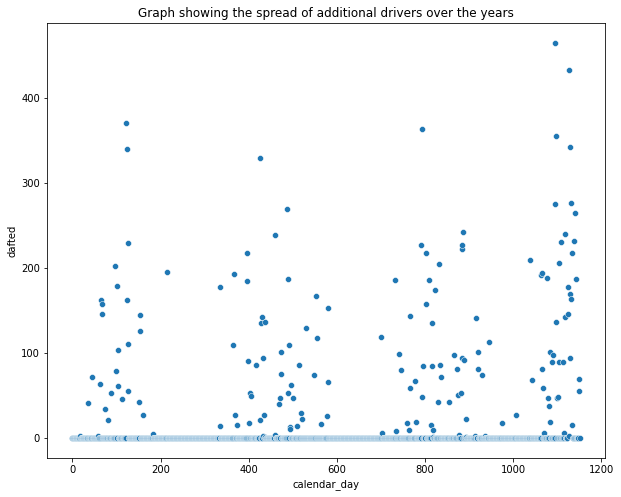

In [ ]:
matplotlib.pyplot.figure(figsize=(10,8))
seaborn.scatterplot(x='calendar_day', y='dafted', data=sicknessDataframe, palette='pastel')
matplotlib.pyplot.title("Graph showing the spread of additional drivers over the years")
matplotlib.pyplot.show()

**Analysis:** Based on the graph above, the number of additional drivers needed due to the lack of standby drivers, seemingly grows faintly from days 0 to 1000. The spread of this data is influenced by the variable 'sby_need'.

In [ ]:

graph = plotly.express.scatter(sicknessDataframe, x="calls", y="sby_need", color="n_duty",
                 title="Graph showing the relationship between standby drivers and emergency calls received against the number of drivers on duty available")
graph.show()


**Analysis:** Based on the graph above, it can be deciphered that the number of standby drivers is directly proportional to the increases in the number of emergency calls received. 